### Utility Functions

In [1]:
import csv
import sys
import os
import numpy as np
import pandas as pd
import heapq
from random import randint
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, KFold

In [2]:
def Report(model, feature_set, label_set):
    print("Training Set Accuracy: {0:.2f}%".format(model.score(X_train, y_train) * 100))
    print("Test     Set Accuracy: {0:.2f}%".format(model.score(X_test, y_test)   * 100))
    
    positive = df[df.Withdrew == 1]
    positive_label = positive.Withdrew.values
    positive_features = positive.drop("Withdrew", axis=1).drop("Reason Code", axis=1)
    
    negative = df[df.Withdrew == 0]
    negative_label = negative.Withdrew.values
    negative_features = negative.drop("Withdrew", axis=1).drop("Reason Code", axis=1)
    
    accuracy = model.score(feature_set, label_set)
    specificity = model.score(positive_features, positive_label)
    sensitivity = model.score(negative_features, negative_label)
    
    print("Accuracy:              {0:.2f}%".format(accuracy    * 100))
    print("Specificity:           {0:.2f}%".format(specificity * 100))
    print("Sensitivity:           {0:.2f}%".format(sensitivity * 100))

### Load Data

In [3]:
WithCompleteAttributes = False

In [4]:
if WithCompleteAttributes:
    df = pd.read_csv("FinalDatasetWithAttributes.csv")
    label = df.Withdrew.astype(int)
    feature_names = df.columns.drop("Withdrew").drop("Reason Code").drop("Unnamed: 0")
    features = df.drop("Withdrew", axis=1).drop("Reason Code", axis=1).drop("Unnamed: 0", axis=1)
    feature_set = features.values
    label_set = label.values
else:
    df = pd.read_csv("FinalDatasetWithoutAttributes.csv")
    df.Sex = df.Sex.replace("m", 1).replace("f", 0)
    df.Withdrew = df.Withdrew.astype(int)
    label = df.Withdrew.astype(int)
    feature_names = df.columns.drop("Withdrew").drop("Reason Code")
    features = df.drop("Withdrew", axis=1).drop("Reason Code", axis=1)
    feature_set = features.values
    label_set = label.values

In [5]:
len(df)

5176

In [16]:
df

,Comorbidity,Age,Sex,StartTreatmentModality,Treatment Duration,Number of Modality Changes,Code 12,Code 13,Code 14,Code 23,Code 24,Code 34,Code 45,Withdrew,Reason Code
0,1,55,0,0,111,2,0,0,0,0,0,0,1,0,99.0
1,1,61,0,0,81,2,0,0,0,0,0,0,1,0,11.0
2,1,111,1,0,60,2,1,0,0,0,0,0,0,0,99.0
3,1,75,1,0,41,4,0,0,0,0,0,0,1,0,99.0
4,1,89,0,1,59,2,0,0,0,0,0,0,0,0,99.0
5,1,71,1,11,98,2,0,0,0,0,0,0,0,0,99.0
6,1,65,1,7,32,3,0,0,0,0,0,0,1,0,99.0
7,1,30,0,6,91,2,0,0,0,0,0,0,1,0,20.0
8,1,74,1,7,47,2,0,0,0,0,0,0,1,0,99.0
9,1,65,1,6,105,4,0,0,0,0,0,0,1,0,99.0


# Decision Tree

### Load Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feature_set, label_set, test_size=0.3, random_state=0)

In [11]:
model = tree.DecisionTreeClassifier(max_features=3, max_depth=2, criterion="entropy")
model.fit(X_train, y_train)
Report(model, feature_set, label_set)

Training Set Accuracy: 95.39%
Test     Set Accuracy: 95.30%
Accuracy:              95.36%
Specificity:           0.00%
Sensitivity:           100.00%


### Feature Importance

In [13]:
h = []
for i in range(len(model.feature_importances_)):
    if model.feature_importances_[i] > 0:
        heapq.heappush(h, (model.feature_importances_[i], feature_names[i]))
h.sort()
h

[(0.006636590884801564, 'Code 12'),
 (0.039405991385410372, 'Age'),
 (0.95395741772978804, 'Treatment Duration')]

### Visualizing the decision treee

In [14]:
from sklearn.tree import export_graphviz
import graphviz

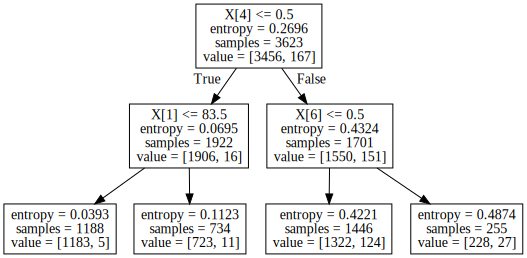

In [15]:
export_graphviz(model, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Prediction Probability

In [17]:
# randomly select a patient
rand = randint(0, len(feature_set)-1)
print("Patient: {} \n\n{}\n\n".format(i, features.iloc[rand]))
print("Prediction: {}".format(bool(model.predict(feature_set[rand].reshape(1, -1))[0])))
print("RealResult: {}".format(bool(label_set[rand])))
print("Confidence: {0:.2f}%".format(max(model.predict_proba(feature_set[rand].reshape(1, -1))[0]) * 100))

Patient: 12 

Comorbidity                    1
Age                           64
Sex                            0
StartTreatmentModality        11
Treatment Duration             0
Number of Modality Changes     1
Code 12                        0
Code 13                        1
Code 14                        1
Code 23                        0
Code 24                        1
Code 34                        0
Code 45                        0
Name: 2638, dtype: int64


Prediction: False
RealResult: False
Confidence: 99.58%


# Neural Network

In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature_set, label_set, test_size=0.3, random_state=0)

In [19]:
model = MLPClassifier(hidden_layer_sizes=(100, 100))
model.fit(X_train, y_train)
Report(model, feature_set, label_set)

Training Set Accuracy: 95.42%
Test     Set Accuracy: 95.36%
Accuracy:              95.40%
Specificity:           0.83%
Sensitivity:           100.00%


### Prediction Probability

In [20]:
# randomly select a patient
rand = randint(0, len(feature_set)-1)
print("Patient: {} \n\n{}\n\n".format(rand, features.iloc[rand]))
print("Prediction: {}".format(bool(model.predict(feature_set[rand].reshape(1, -1))[0])))
print("RealResult: {}".format(bool(label_set[rand])))
print("Confidence: {0:.2f}%".format(max(model.predict_proba(feature_set[rand].reshape(1, -1))[0]) * 100))

Patient: 3143 

Comorbidity                    1
Age                           90
Sex                            1
StartTreatmentModality         0
Treatment Duration             1
Number of Modality Changes     3
Code 12                        0
Code 13                        1
Code 14                        1
Code 23                        0
Code 24                        1
Code 34                        0
Code 45                        1
Name: 3143, dtype: int64


Prediction: False
RealResult: False
Confidence: 99.45%


##### Even though the prediction results looks promising, the dataset is not imbalanced because most of the patients are not withdrawed.

### Analysis

In [26]:
print("Withdraw percentage in dataset is {0:.2f}%".format(label_set.sum() / len(label_set) * 100))

Withdraw percentage in dataset is 4.64%


### We have an imbalanced dataset, with most samples belongs to "not withdrawed" class.
### What if we make the data more balanced.

In [27]:
from imblearn.datasets import make_imbalance

In [28]:
balanced_feature_set, balanced_label_set = make_imbalance(feature_set, label_set, ratio=0.99, min_c_=0)
X_train, X_test, y_train, y_test = train_test_split(balanced_feature_set, balanced_label_set, test_size=0.3, random_state=0)

In [29]:
model = MLPClassifier(hidden_layer_sizes=(100, 100))
model.fit(X_train, y_train)
Report(model, feature_set, label_set)

Training Set Accuracy: 60.36%
Test     Set Accuracy: 68.06%
Accuracy:              73.44%
Specificity:           50.83%
Sensitivity:           74.53%


In [30]:
model = tree.DecisionTreeClassifier(max_features=4, max_depth=3, criterion="entropy")
model.fit(X_train, y_train)
Report(model, feature_set, label_set)

Training Set Accuracy: 85.29%
Test     Set Accuracy: 89.58%
Accuracy:              84.14%
Specificity:           89.17%
Sensitivity:           83.89%


In [62]:
df

,Comorbidity,Age,Sex,StartTreatmentModality,Treatment Duration,Number of Modality Changes,Code 12,Code 13,Code 14,Code 23,Code 24,Code 34,Code 45,Withdrew,Reason Code
0,1,55,0,0,111,2,0,0,0,0,0,0,1,0,99.0
1,1,61,0,0,81,2,0,0,0,0,0,0,1,0,11.0
2,1,111,1,0,60,2,1,0,0,0,0,0,0,0,99.0
3,1,75,1,0,41,4,0,0,0,0,0,0,1,0,99.0
4,1,89,0,1,59,2,0,0,0,0,0,0,0,0,99.0
5,1,71,1,11,98,2,0,0,0,0,0,0,0,0,99.0
6,1,65,1,7,32,3,0,0,0,0,0,0,1,0,99.0
7,1,30,0,6,91,2,0,0,0,0,0,0,1,0,20.0
8,1,74,1,7,47,2,0,0,0,0,0,0,1,0,99.0
9,1,65,1,6,105,4,0,0,0,0,0,0,1,0,99.0


In [24]:
df[df.Withdrew == 1].Age.mean()

77.11666666666666

In [25]:
df[df.Withdrew == 1].Age.std()

15.780493935311368

In [33]:
df[df.Withdrew == 1]["Treatment Duration"].mean()

32.920833333333334

In [34]:
df[df.Withdrew == 1]["Treatment Duration"].std()

40.702384242015334

In [35]:
df[df.Withdrew == 0]["Treatment Duration"].mean()

15.282009724473257

In [36]:
df[df.Withdrew == 0]["Treatment Duration"].std()

33.327047358048077

In [43]:
df[df.Withdrew == 1]["Treatment Duration"].plot(kind="Hist")

In [39]:
import matplotlib.pyplot as plt

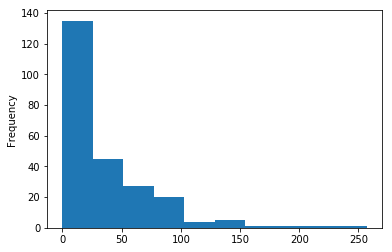

In [44]:
plt.show()